# Install requirements

In [1]:
!pip install sklearn pandas
!pip install prettytable
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=deac021c5ae1f084fe021be7742ba613514f24d34f38c042d8286209284b15ed
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Read dataset

In [2]:
import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from prettytable import PrettyTable
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [4]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

# Call **Decision tree** from `sklearn`

In [8]:
print('Decision tree')
from sklearn import tree

head = PrettyTable(['random_state', 'max_depth', 'confusion_matrix', 'classification_report', 'f1_score_micro_test', 'f1_score_micro_train'])

f1_score_micro_test_array = []
f1_score_micro_train_array = []

max_depth_range = list(range(1, 32))
for depth in max_depth_range:

  '''Create decision tree classifier'''
  model = tree.DecisionTreeClassifier(max_depth = depth, random_state = 0)

  '''Train and test'''
  model.fit(train_features, train_target)
  preds_test = model.predict(test_features)
  preds_train = model.predict(train_features)
  confusion_matrix1 = confusion_matrix(test_target, preds_test)
  classification_report1 = classification_report(test_target, preds_test)

  from sklearn.metrics import f1_score

  f1_weighted = f1_score(test_target, preds_test, average = 'weighted')
  f1_macro = f1_score(test_target, preds_test, average = 'macro')
  f1_micro_test = f1_score(test_target, preds_test, average = 'micro')
  f1_micro_train = f1_score(train_target, preds_train, average = 'micro')

  f1_score_weighted = "%.2f"%round(f1_weighted, 2)
  f1_score_macro = "%.2f"%round(f1_macro, 2)
  f1_score_micro_test = "%.2f"%round(f1_micro_test, 2)
  f1_score_micro_train = "%.2f"%round(f1_micro_train, 2)

  f1_score_micro_test_array.append(f1_score_micro_test)
  f1_score_micro_train_array.append(f1_score_micro_train)

  head.add_row(['0', depth, confusion_matrix1, classification_report1, f1_score_micro_test, f1_score_micro_train])
print(head)


Decision tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

+--------------+-----------+--------------------+-------------------------------------------------------+---------------------+----------------------+
| random_state | max_depth |  confusion_matrix  |                 classification_report                 | f1_score_micro_test | f1_score_micro_train |
+--------------+-----------+--------------------+-------------------------------------------------------+---------------------+----------------------+
|      0       |     1     | [[1099    0  943]  |               precision    recall  f1-score   support |         0.39        |         0.39         |
|              |           |  [ 636    0  691]  |                                                       |                     |                      |
|              |           |  [ 281    0  525]] |            0       0.55      0.54      0.54      2042 |                     |                      |
|              |           |                    |            1       0.00      0.00      0.00 

In [44]:
model = tree.DecisionTreeClassifier(max_depth = 8, random_state = 90)

model.fit(train_features, train_target)
preds_test = model.predict(test_features)
preds_train = model.predict(train_features)

Report for test set:

               precision    recall  f1-score   support

     class 0       0.56      0.51      0.53      2042
     class 1       0.33      0.33      0.33      1327
     class 2       0.33      0.40      0.36       806

    accuracy                           0.43      4175
   macro avg       0.40      0.41      0.41      4175
weighted avg       0.44      0.43      0.43      4175



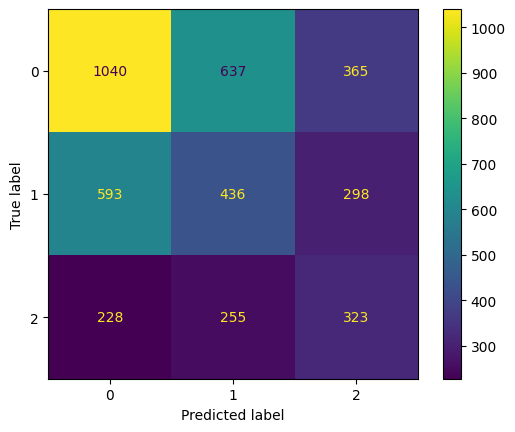

-------------------------------------------------------
Report for train set:

               precision    recall  f1-score   support

     class 0       0.46      0.55      0.50      8164
     class 1       0.43      0.41      0.42      8164
     class 2       0.58      0.52      0.55      8164

    accuracy                           0.49     24492
   macro avg       0.49      0.49      0.49     24492
weighted avg       0.49      0.49      0.49     24492



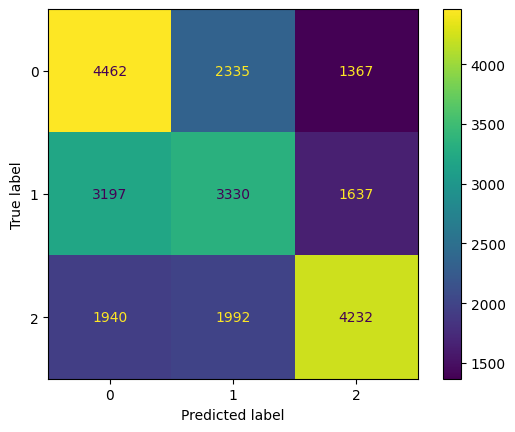

In [45]:
import numpy
target_names = ['class 0', 'class 1', 'class 2']

print("Report for test set:\n\n", classification_report(test_target, numpy.round(preds_test), target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, numpy.round(preds_test))
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=['0', '1', '2'])
test_disp.plot()
plt.show()
print("-------------------------------------------------------")
print("Report for train set:\n\n", classification_report(train_target, numpy.round(preds_train), target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, numpy.round(preds_train))
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=['0', '1', '2'])
train_disp.plot()
plt.show()

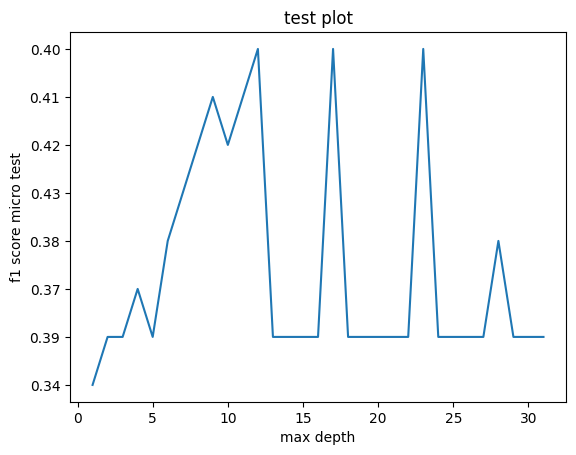

In [ ]:
plt.plot(max_depth_range, f1_score_micro_test_array)
plt.xlabel('max depth')
plt.ylabel('f1 score micro test')
plt.title('test plot')
plt.show()

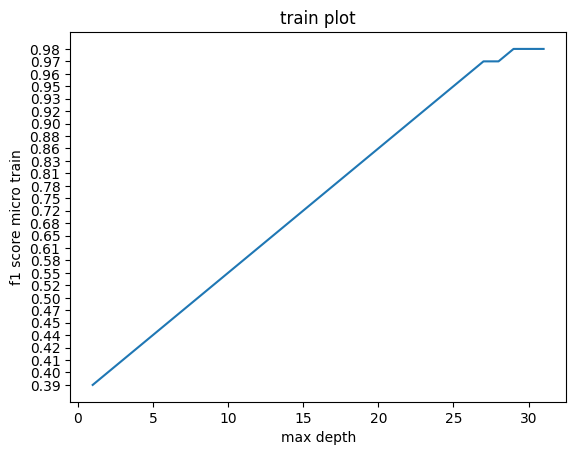

In [ ]:
plt.plot(max_depth_range, f1_score_micro_train_array)
plt.xlabel('max depth')
plt.ylabel('f1 score micro train')
plt.title('train plot')
plt.show()